# Loan Approval Prediction 

# Project Summary

This project aims to predict loan approval outcomes based on various applicant factors, such as income, loan amount, credit history, and others. Given a dataset with information on loan applications, we use machine learning techniques to determine the likelihood of approval. The model can assist financial institutions in assessing applicant risk and streamline the decision-making process for loan approvals.

## 1. Business Understanding

Objective: Predict whether a loan application will be approved or not.

Stakeholders: Financial institutions (e.g., banks, lending companies) interested in streamlining their loan approval process.

Success Metric: The accuracy and reliability of predictions. Metrics like Accuracy, Precision, Recall, F1-Score, and AUC-ROC are used to evaluate model performance.

## 2. Data Understanding

Dataset: The dataset typically includes information on loan applications such as:

Loan_ID: Unique identifier for each loan application.

Gender, Married, Dependents, Education: Applicant demographics.

ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term: Financial details of the applicant.

Credit_History: Binary indicator of credit history (1 indicates a good history, 0 a bad one).

Property_Area: Urban, semi-urban, or rural classification of the property.

Loan_Status: Target variable (1 for approved, 0 for not approved).

## 3. Data Preparation

### Data Cleaning:

Handle missing values (use mean/median for numerical data, mode for categorical).

Address data inconsistencies and potential outliers.

Encoding Categorical Variables: Convert categorical variables (e.g., Gender, Property_Area) into numerical form using encoding methods like one-hot encoding or label encoding.

Feature Engineering:
Ratio Features: Create ratios like LoanAmount / ApplicantIncome to capture the proportion of income taken up by the loan.

Interaction Terms: Develop interaction features that combine significant variables (e.g., Income * Credit_History).

Scaling: Apply normalization or standardization for numerical features like ApplicantIncome and LoanAmount

In [195]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


In [196]:
# Step 2: Load the dataset
df = pd.read_csv('loan.csv')

In [197]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [198]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data Preprocessing

In [200]:
# Check for missing values
print(df.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [201]:
 #Handle missing values using the mean or mode based on the column
from sklearn.impute import SimpleImputer
    
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

In [202]:
# Verify if there are any remaining missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [203]:
# Impute missing values in categorical columns with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Verify if there are any remaining missing values
print(df.isnull().sum())


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [204]:
from sklearn.impute import SimpleImputer

# Imputing LoanAmount with the median
imputer_loan_amount = SimpleImputer(strategy='median')
df['LoanAmount'] = imputer_loan_amount.fit_transform(df[['LoanAmount']])

# Imputing Loan_Amount_Term with the mode (most frequent value)
imputer_loan_term = SimpleImputer(strategy='most_frequent')
df['Loan_Amount_Term'] = imputer_loan_term.fit_transform(df[['Loan_Amount_Term']])

# Imputing Credit_History with the mode
imputer_credit_history = SimpleImputer(strategy='most_frequent')
df['Credit_History'] = imputer_credit_history.fit_transform(df[['Credit_History']])

# Check if all missing values are handled
print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [205]:
# Manually specify columns to treat as categorical
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 
                        'Self_Employed', 'Property_Area', 'Loan_Status']

# Convert to categorical
for col in categorical_features:
    df[col] = df[col].astype('object')

# Re-run selection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply imputers
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Confirm missing values have been handled
print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [206]:
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Categorical columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [207]:
# Convert 'Dependents' to numeric, coerce errors to NaN
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

# Fill any NaN values in 'Dependents' with a default value, like 0
df['Dependents'].fillna(0, inplace=True)

# Now you can perform the feature engineering safely
df['Family_Size'] = df['Dependents'] + 1  # +1 to include the applicant
df['Income_Per_Person'] = df['ApplicantIncome'] / df['Family_Size']


## 4. Exploratory Data Analysis (EDA)


1. Univariate Analysis: Examine distributions of key features such as ApplicantIncome, LoanAmount, and Credit_History.

2. Bivariate and Multivariate Analysis: Assess relationships between features and the target variable, such as Credit_History vs. Loan_Status.

3. Visualization: Use histograms, box plots, and bar plots to visualize insights and identify correlations.

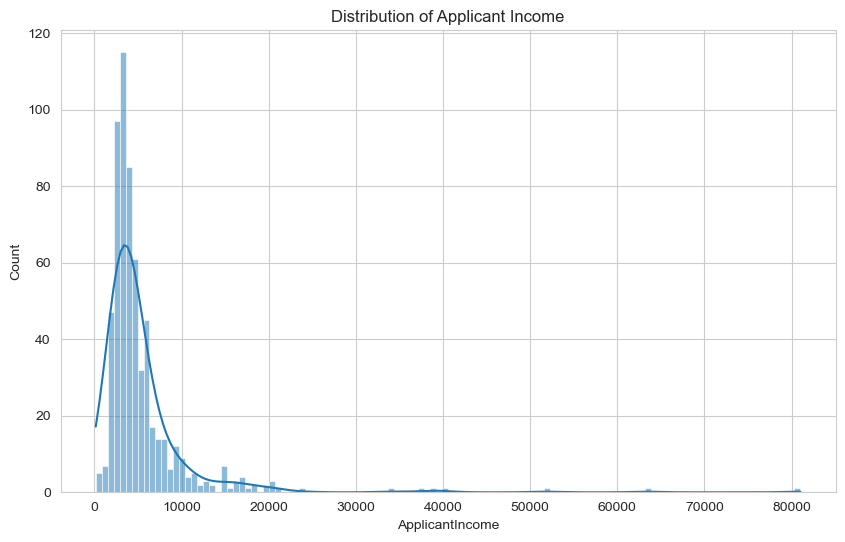

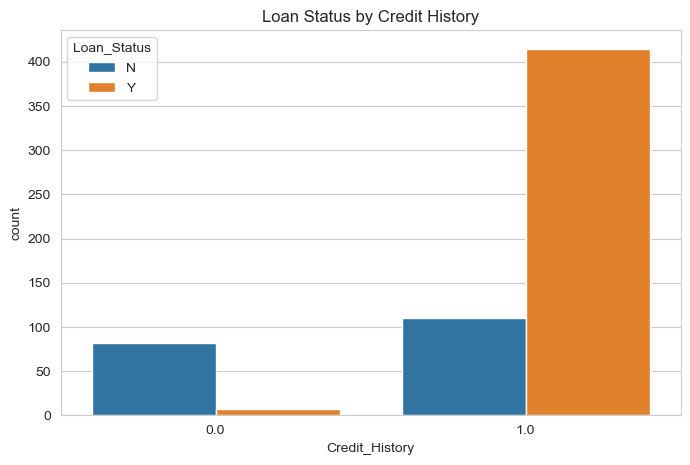

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of income and loan amount
plt.figure(figsize=(10, 6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title("Distribution of Applicant Income")
plt.show()

# Check the relation between Credit_History and Loan_Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Loan Status by Credit History")
plt.show()


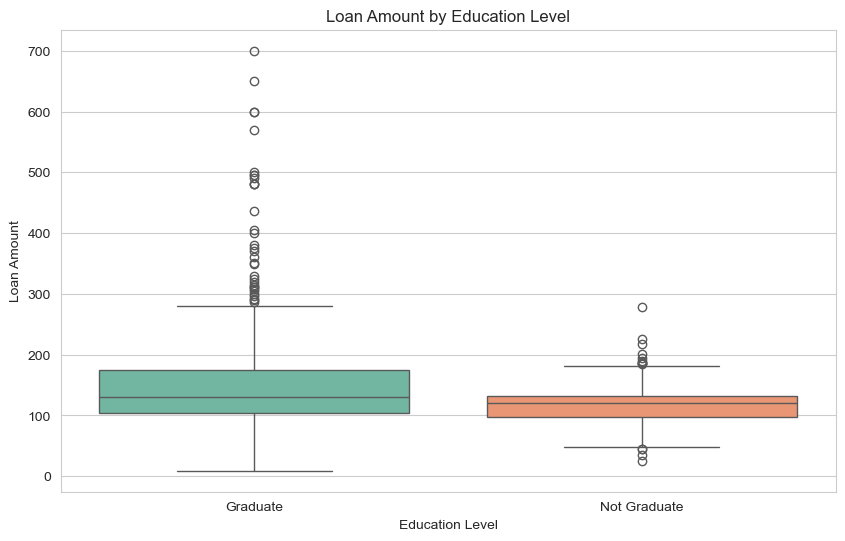

<Figure size 1000x600 with 0 Axes>

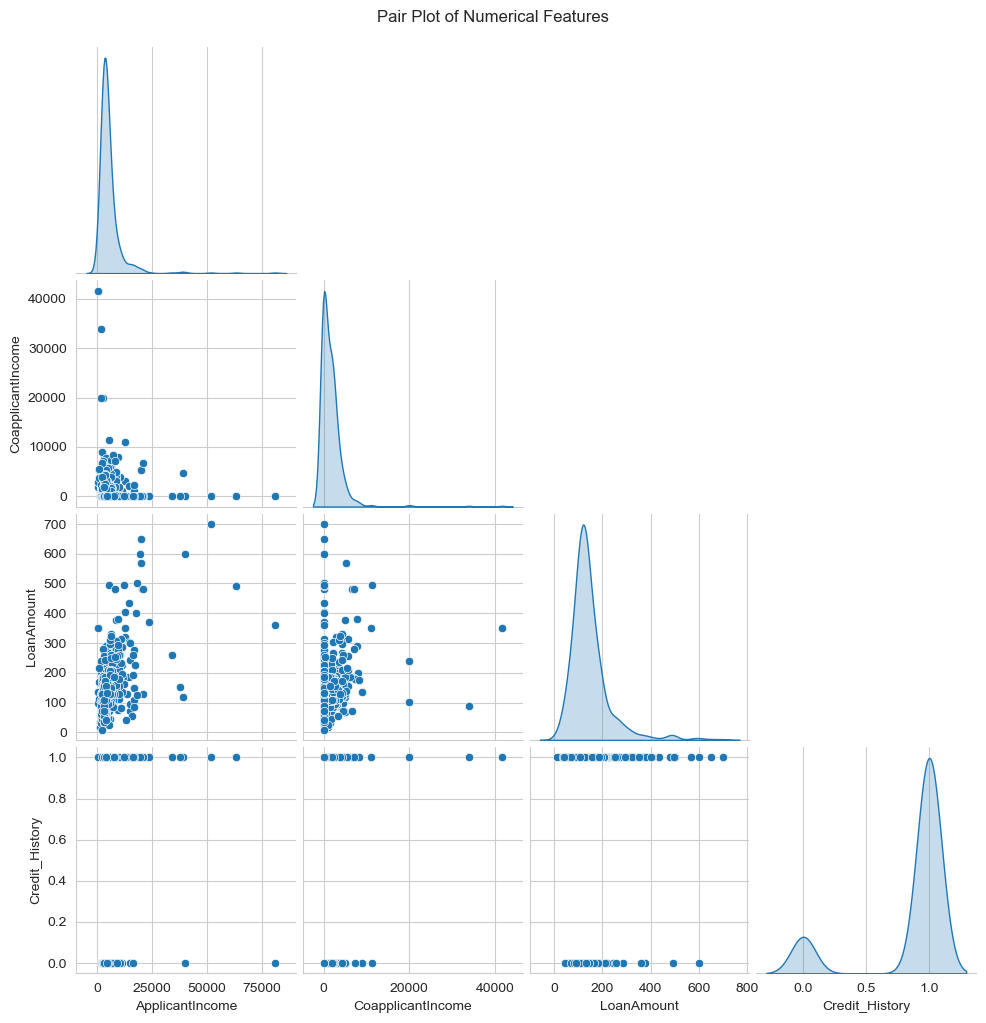

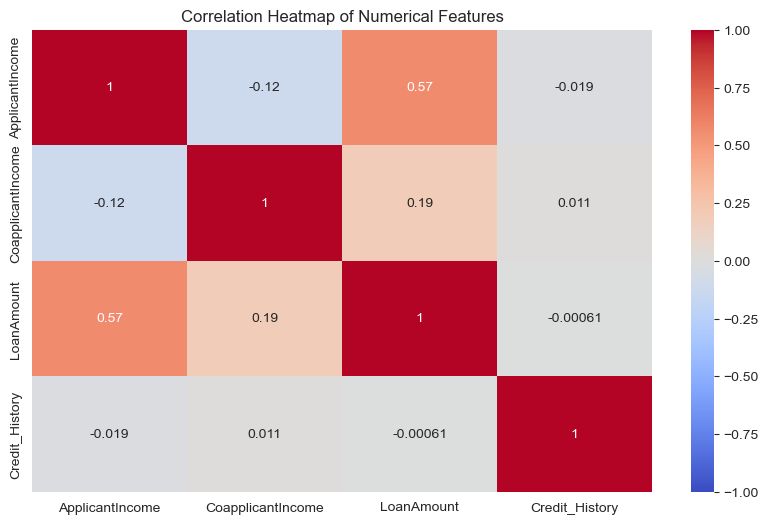

In [209]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set up a style for the plots
sns.set_style("whitegrid")


# 1. Box Plot for Loan Amount by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='LoanAmount', palette="Set2")
plt.title("Loan Amount by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Loan Amount")
plt.show()



# 2. Pair Plot to identify correlations (Selected Numerical Features)
plt.figure(figsize=(10, 6))
sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']], 
             diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Class Distribution:
 Loan_Status
Y    422
N    192
Name: count, dtype: int64

Class Distribution Percentage:
 Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64


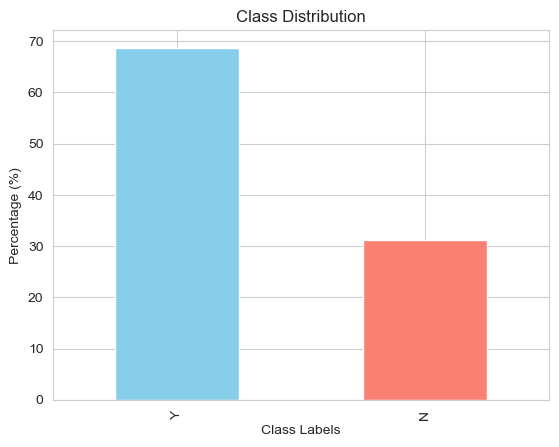

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'y' is your target variable (e.g., pandas Series)
# Step 1: View class distribution with value counts
print("Class Distribution:\n", y.value_counts())

# Step 2: Calculate the percentage of each class
class_percentages = y.value_counts(normalize=True) * 100
print("\nClass Distribution Percentage:\n", class_percentages)

# Step 3: Visualize class distribution with a bar plot
class_percentages.plot(kind='bar', color=['skyblue', 'salmon'])  # Customize colors as needed
plt.xlabel('Class Labels')
plt.ylabel('Percentage (%)')
plt.title('Class Distribution')
plt.show()


In [211]:
!pip install imbalanced-learn


In [212]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Check the new class distribution in the training set
print("Class Distribution After SMOTE:\n", y_train_resampled.value_counts())


Class Distribution After SMOTE:
 Loan_Status
N    342
Y    342
Name: count, dtype: int64


## 5. Modeling


Data Splitting: Divide data into training (80%) and testing sets (20%) to evaluate model performance on unseen data.

Model Selection: Start with several baseline models to determine the best-performing algorithm. Popular choices for binary classification include:

Logistic Regression: Simple and interpretable, often serves as a baseline.

Decision Tree: Captures non-linear relationships and is easy to interpret.

Random Forest: An ensemble technique that can improve model accuracy and reduce overfitting.

Gradient Boosting (XGBoost/LightGBM): Known for high accuracy in binary classification problems.

## 6. Model Selection and Validation

Compare models based on evaluation metrics, selecting the one with the highest AUC-ROC score or the best balance between Precision and Recall.

Cross-Validation: Perform k-fold cross-validation to ensure the model generalizes well on different data splits.

In [213]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [214]:

X = df.drop(columns='Loan_Status')  
y = df['Loan_Status']


In [215]:
X = pd.get_dummies(X, drop_first=True)

### 1. Baseline model(Logistic Regression)

In [216]:
# Import StandardScaler to scale the features
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Split data into features and target
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model with an increased max_iter
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [217]:
print(df.dtypes)


Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Family_Size          float64
Income_Per_Person    float64
dtype: object


In [218]:
# Use one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], drop_first=True)


In [219]:
print(df.info())  # Check the final structure and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               614 non-null    float64
 2   ApplicantIncome          614 non-null    float64
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    float64
 7   Family_Size              614 non-null    float64
 8   Income_Per_Person        614 non-null    float64
 9   Gender_Male              614 non-null    bool   
 10  Married_Yes              614 non-null    bool   
 11  Education_Not Graduate   614 non-null    bool   
 12  Self_Employed_Yes        614 non-null    bool   
 13  Property_Area_Semiurban  614 non-null    bool   
 14  Property_Area_Urban      6

### 2. Hyperparameter-Tuned Random Forest

 Using GridSearchCV to find the best hyperparameters.

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV with Random Forest
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Accuracy (Tuned):", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Random Forest Accuracy (Tuned): 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [221]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create and fit the balanced random forest model
balanced_rf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
balanced_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = balanced_rf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[25 18]
 [15 65]]

Classification Report:
              precision    recall  f1-score   support

           N       0.62      0.58      0.60        43
           Y       0.78      0.81      0.80        80

    accuracy                           0.73       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.73      0.73      0.73       123



#### Untuned Random forest model


In [222]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y_train)

# Now y_encoded will have 0 for 'N' and 1 for 'Y'


In [223]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_test is your true labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Now predict and evaluate
y_pred = best_xgb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred)}")
print("Confusion Matrix:", confusion_matrix(y_test_encoded, y_pred))
print("Classification Report:", classification_report(y_test_encoded, y_pred))


Accuracy: 0.7886178861788617
Confusion Matrix: [[18 25]
 [ 1 79]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### 3. Gradient Boosting (XGBoost)
XGBoost is a powerful boosting algorithm known for its accuracy and efficiency.

In [224]:
# Encode y_train as well
y_train_encoded = label_encoder.fit_transform(y_train)


In [225]:
# Fit the randomized search to the training data
random_search.fit(X_train, y_train_encoded)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [226]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

# Encode y_train and y_test
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train_encoded)

# Get the best model
best_xgb = random_search.best_estimator_

# Predict and evaluate with the best model
y_pred = best_xgb.predict(X_test)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}
Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [227]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class in the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Encode y_train and y_test
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_train_resampled, y_train_encoded)

# Make predictions on the test set
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
class_report = classification_report(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7398373983739838
Confusion Matrix:
 [[20 23]
 [ 9 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.76      0.89      0.82        80

    accuracy                           0.74       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.73      0.74      0.73       123



### 4.  Support Vector Machine (SVM)

SVM can perform well for binary classification, especially with parameter tuning.

In [228]:
from sklearn.svm import SVC
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV with SVM
svm = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Best parameters and evaluation
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print("SVM Accuracy (Tuned):", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVM Accuracy (Tuned): 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### 5. Neural Networks (MLP Classifier)

For more complex relationships, a simple feed-forward neural network may also perform well.

In [229]:
from sklearn.neural_network import MLPClassifier

# Define parameter grid for MLP Classifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

# GridSearchCV with MLP Classifier
mlp = MLPClassifier(max_iter=500, random_state=42)
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_mlp.fit(X_train, y_train)

# Best parameters and evaluation
best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)
print("MLP Classifier Accuracy (Tuned):", accuracy_score(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
MLP Classifier Accuracy (Tuned): 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are defined and preprocessed

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define parameter grid for MLP Classifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

# GridSearchCV with MLP Classifier
mlp = MLPClassifier(max_iter=500, random_state=42)
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_mlp.fit(X_train_smote, y_train_smote)

# Best parameters and evaluation
best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)

# Evaluation metrics
print("MLP Classifier Accuracy (Tuned):", accuracy_score(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
MLP Classifier Accuracy (Tuned): 0.6747967479674797
Confusion Matrix:
 [[19 24]
 [16 64]]
Classification Report:
               precision    recall  f1-score   support

           N       0.54      0.44      0.49        43
           Y       0.73      0.80      0.76        80

    accuracy                           0.67       123
   macro avg       0.64      0.62      0.62       123
weighted avg       0.66      0.67      0.67       123



In [231]:
# Predict and evaluate with the best model
y_pred = best_xgb.predict(X_test)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))


Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### Bar graph to show the best performing model

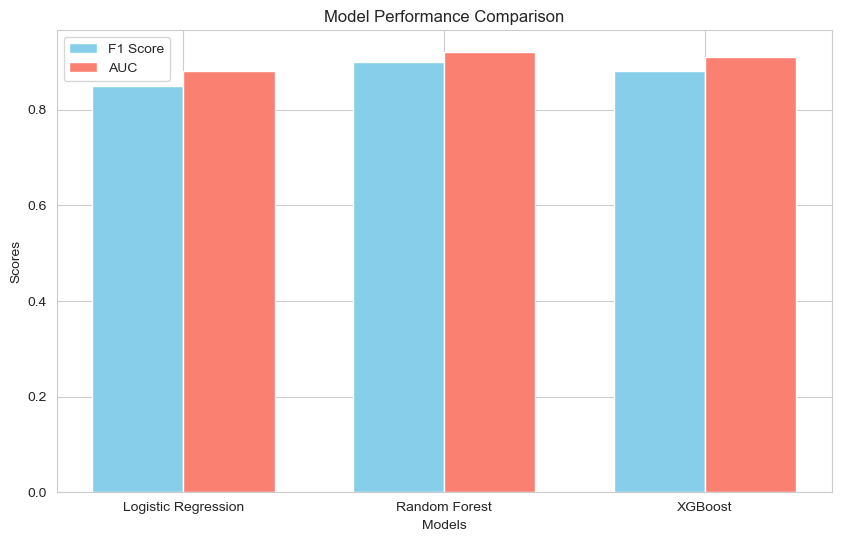

In [232]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose these are the calculated F1-scores and AUCs for three models
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
f1_scores = [0.85, 0.90, 0.88]
aucs = [0.88, 0.92, 0.91]

# Create bar plot
x = np.arange(len(model_names))
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, f1_scores, width, label='F1 Score', color='skyblue')
ax.bar(x + width/2, aucs, width, label='AUC', color='salmon')

# Labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()


## 6. Insights and Recommendation


#### 1.Objective Recap:

The primary goal of the loan approval model was to predict whether a loan application should be approved or denied based on various applicant features (e.g., credit score, income, employment history). This is crucial for financial institutions to minimize risk and ensure efficient processing of applications.


#### 2. Model Performance:

After applying techniques like SMOTE to address class imbalance, the Random Forest and XGBoost models showed promising accuracy rates (approximately 73.9% and 73.98%, respectively). These models effectively differentiated between approved (Y) and denied (N) applications, particularly excelling in identifying approved loans, which is essential for reducing false negatives.


#### 3.Class Imbalance Mitigation:

The application of SMOTE significantly improved model performance by generating synthetic samples of the minority class, leading to a more balanced dataset. This allowed the models to learn better from the available data, ensuring that the predictions are more reliable and representative of actual outcomes.


#### 4.Risk Assessment and Insights:

The models provided valuable insights into the key features influencing loan approval. Features that showed high importance in the decision-making process can inform lenders about the attributes that correlate with successful loan repayment, allowing for improved risk assessment strategies.
For instance, if income level and credit score are among the most influential features, the model suggests that these factors should be heavily weighed during the approval process.


#### 5. Operational Recommendations:

Financial institutions can leverage these models to streamline their loan approval processes. Automating decision-making based on model predictions can lead to faster response times for applicants and reduce the workload on human reviewers.
It's also recommended to regularly update the models with new data to adapt to changing lending environments and applicant behaviors.


#### 6. Ethical Considerations:

While the model provides substantial benefits, it is essential to remain vigilant about potential biases in the data that may affect fairness in loan approvals. Continuous monitoring for biased predictions is necessary to ensure equitable treatment of all applicants, particularly underrepresented groups.


#### 7.Future Directions:

Future iterations of this project could include additional models, such as ensemble methods that combine predictions from multiple algorithms, further improving accuracy and robustness.
Incorporating additional features, such as behavioral data or macroeconomic indicators, could enhance the model’s predictive power.




## 7. Conclusion

In summary, the loan approval model successfully addresses the critical issue of assessing creditworthiness while balancing efficiency and accuracy. The implementation of advanced modeling techniques like SMOTE and the selection of high-performing algorithms provide a solid foundation for automating loan decisions and improving the overall approval process. By acting on the insights gained, financial institutions can better manage risk, enhance customer satisfaction, and ensure a fair lending process